# MUON TOMOGRAPHY: IMAGING
In this exercise I will take the most naive approach towards an imaging exercise using muons: I will create a solid with funny holes inside and see what I can do to magine them beaming muons that are generated parallel to the geometry with a flat energy distribution in the range $[1,10] \ \mathrm{GeV}$ (editing `generator.cc`)


I will follow two paths. In the first I will just rely on the difference between the projection before and after the target, and on a second run I will show how using the momentum information, even if roughly, one can improve the imaging resoluti|on.

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Open our csv file
df = pd.read_csv("../input/muons-image.txt", on_bad_lines="skip", header=0)
df = df.apply(pd.to_numeric, errors="coerce")
df.eval("p1 = sqrt(px1**2 + py1**2 + pz1**2)", inplace=True)
df.eval("p0 = sqrt(px0**2 + py0**2 + pz0**2)", inplace=True)
#Setting up an energy threshold helps cleaning up the image!
df.query('p0 > 4000',inplace=True)
# This Will be our coordinates before: 
x1, y1 = df["x0"], df["y0"]
# Let's clean up and see what's after!
df.dropna(inplace=True)
df.query("p1 > 100 & p0 > 100", inplace=True)
df.query("z1 > 3000", inplace=True)
df.eval(
    "dtheta = log(arccos( (px1*px0 + py1*py0 + pz1*pz0)/sqrt(px1**2 + py1**2 + pz1**2) / sqrt(px0**2 + py0**2 + pz0**2) ))",
    inplace=True,
)
# THis is our histogram for those muons that went through the target!
x2, y2 = df["x0"], df["y0"]


bins = [np.linspace(-6000, 6000, 50), np.linspace(-6000, 6000, 50)]
df.dropna(inplace=True)

/var/folders/v3/l5f5d9mj64sd25xw2c2nrg9r0000gn/T/ipykernel_65268/1078343117.py:9: RuntimeWarning: invalid value encountered in divide
  hist_diff = (hist2/hist1)


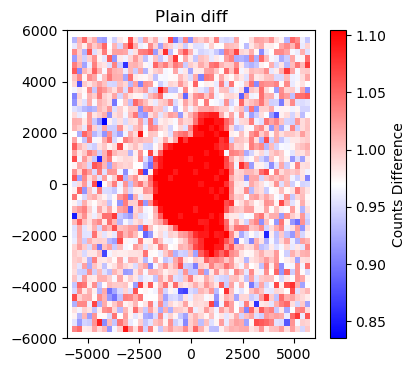

In [179]:
hist1, xedges, yedges = np.histogram2d(x1, y1, bins=bins,
                                                density=True
                                        )
hist2, _, _ = np.histogram2d(x2, y2, bins=bins, 
                                     density=True
                             )

# Subtract histograms
hist_diff = (hist2/hist1) 
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# Plot the difference as a heatmap

cmesh = ax.pcolormesh(
    xedges, yedges, (hist_diff), cmap="bwr", shading="auto"
)  # "bwr" shows positive/negative differences
ax.set_title("Plain diff")
fig.colorbar(cmesh, ax=ax, label="Counts Difference")



plt.show()

This simple exercise shows how a beam of muons can be used to image the inner structure of a target. A similar approach to that of the `tomography_example` notebook and actually define regions and obtain the effective density $\rho_\mathrm{eff}$ and make use of the knowledge of the momentum distribution to obtain a better defined image. Another option is to measure the momentum, even in thick bins, with Cherenkov radiators. Like what they describe in https://arxiv.org/pdf/2201.02591 . And not only look at flux change but also stopping power of those tracks that survie. The final piece of information would come from the deflection coming from Multiple Scattering. I can come up with other ideas and publish them accordingly!